In [1]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath('C:/Users/ingse/OneDrive/Desktop/repositorio/pj_sa_202402/src'))
import matplotlib.pyplot as plt
from scipy.stats import *
from funciones import *

import seaborn as sns


In [2]:
np.random.seed(0)
edades=datos_sesgados(3,100000,63)

In [3]:
tamano_muestra=100
muestra = np.random.choice(edades,tamano_muestra)

print(muestra)
muestras_generadas=np.array([])
num_muestra=100
for  i in range (num_muestra):
    muestras_generadas=np.append(muestras_generadas,np.random.choice(edades,tamano_muestra,replace=False))
muestras_generadas=muestras_generadas.reshape(-1,tamano_muestra)
print (muestras_generadas)
int_confi=np.quantile(muestras_generadas.mean(axis=1),[0.025,0.975])
print(int_confi)

[32.  34.8 34.9 31.6 34.6 36.3 33.5 40.7 29.6 36.8 37.  30.8 38.4 32.3
 40.6 30.4 28.7 31.6 39.9 41.7 27.1 31.6 28.3 34.2 28.8 35.7 41.  31.2
 34.6 29.7 43.3 33.8 36.7 30.2 31.6 37.9 35.7 36.9 37.1 40.5 30.5 39.7
 38.5 32.8 40.8 34.7 37.1 34.1 29.7 45.9 33.  42.6 37.1 38.8 31.2 33.4
 33.5 32.6 31.6 33.2 33.6 33.4 34.4 26.3 25.5 36.  48.2 43.2 33.8 29.2
 29.8 35.3 33.3 42.6 36.8 35.3 32.5 44.6 33.8 36.7 38.3 36.3 29.5 42.6
 44.6 31.1 33.8 34.7 38.2 37.8 30.8 31.1 31.3 31.3 31.9 30.2 26.2 35.9
 35.1 29.4]
[[38.4 29.2 36.3 ... 25.9 27.5 31.4]
 [27.2 38.2 42.  ... 37.9 46.3 47.1]
 [37.4 38.1 27.1 ... 35.1 33.  36.8]
 ...
 [35.1 30.3 41.6 ... 31.8 44.  20.2]
 [41.  30.8 28.6 ... 33.  27.9 34.9]
 [36.6 36.5 32.  ... 33.9 34.3 33.2]]
[32.79345 34.94675]


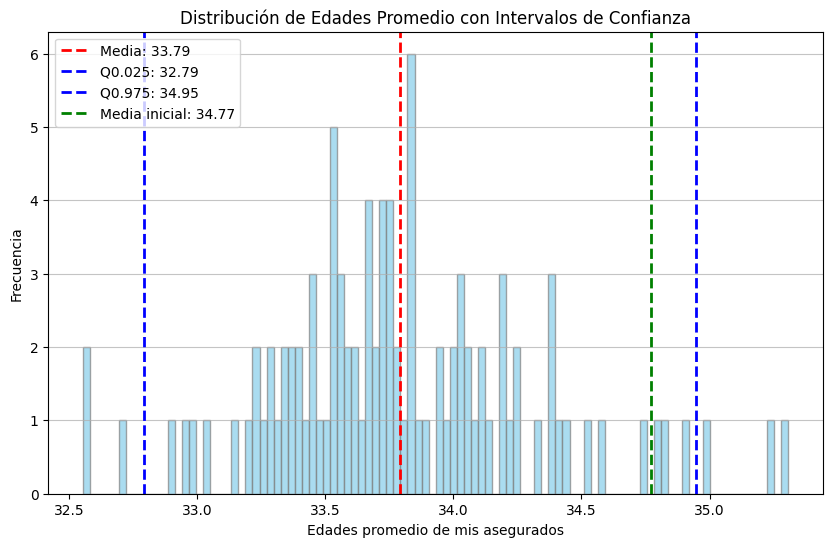

In [4]:
medias_muestras = muestras_generadas.mean(axis=1)
# Crear el histograma y agregar las líneas de los cuantiles y la media
plt.figure(figsize=(10, 6))
plt.hist(medias_muestras, bins=100, color="skyblue", edgecolor='gray', alpha=0.7)
plt.axvline(medias_muestras.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {medias_muestras.mean():.2f}')
plt.axvline(int_confi[0], color='blue', linestyle='--', linewidth=2, label=f'Q0.025: {int_confi[0]:.2f}')
plt.axvline(int_confi[1], color='blue', linestyle='--', linewidth=2, label=f'Q0.975: {int_confi[1]:.2f}')
plt.axvline(muestra.mean(), color='green', linestyle='--', linewidth=2, label=f'Media inicial: {muestra.mean():.2f}')

# Añadir etiquetas y leyenda
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades Promedio con Intervalos de Confianza")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

[*********************100%***********************]  1 of 1 completed


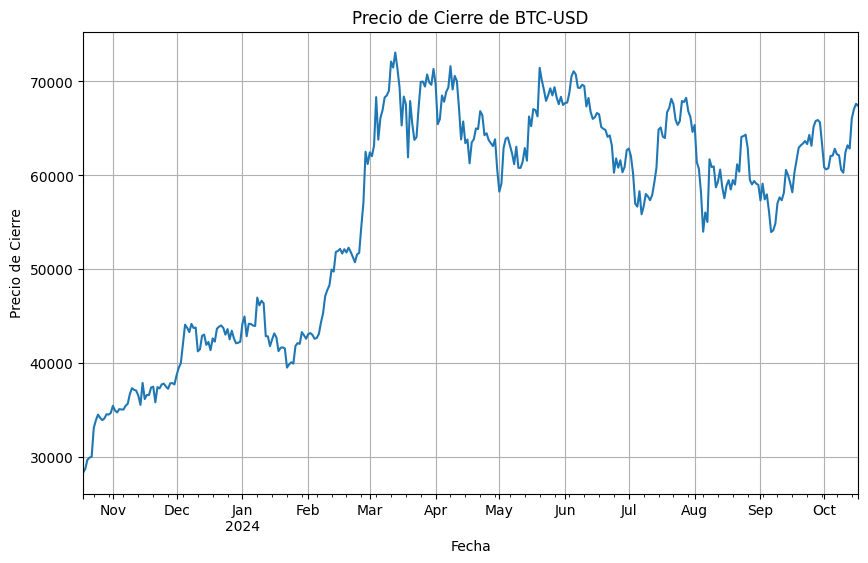

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
                              Adj Close         Close          High  \
Date                                                                  
2023-10-18 00:00:00+00:00  28328.341797  28328.341797  28889.009766   
2023-10-19 00:00:00+00:00  28719.806641  28719.806641  28892.474609   
2023-10-20 00:00:00+00:00  29682.949219  29682.949219  30104.085938   
2023-10-21 00:00:00+00:00  29918.412109  29918.412109  30287.482422   
2023-10-22 00:00:00+00:00  29993.896484  29993.896484  30199.433594   
...                                 ...           ...           ...   
2024-10-13 00:00:00+00:00  62851.375000  62851.375000  63272.652344   
2024-10-14 00:00:00+00:00  66046.125000  66046.125000  66482.492188   
2024-10-15 00:00:00+00:00  67041.109375  67041.109375  67881.679688   
2024-10-16 00:00:00+00:00  67612.718750  67612.718750  68375.289062   
2024-10-17 00:00:00+00:00  67399.835938  67399.835938  67912.210938  

In [20]:
# Parametros extraccion 
Montecarlo_results = pd.DataFrame()
ticker = 'BTC-USD'  
start_date = '2023-10-18'
end_date = '2024-10-18'
data=extrae(ticker, start_date, end_date)
print(data.columns)
print(data)


In [ ]:
bitcoin = pd.DataFrame({
    'fecha': data.index,         
    'Close': data['Adj Close']  
})
bitcoin['retorno'] = np.log(data['Adj Close'] / data['Adj Close'].shift(-1))
bitcoin = bitcoin.sort_values(by='fecha', ascending=False)
bitcoin = bitcoin.reset_index(drop=True)
num_registros = np.random.randint(1, 366)
bitcoin = bitcoin.head(num_registros) 
print(f"Se seleccionaron {num_registros} registros aleatorios para bitcoin.")
print(bitcoin)

Se seleccionaron 124 registros aleatorios para bitcoin.
                        fecha         Close   retorno
0   2024-10-17 00:00:00+00:00  67399.835938       NaN
1   2024-10-16 00:00:00+00:00  67612.718750  0.003154
2   2024-10-15 00:00:00+00:00  67041.109375 -0.008490
3   2024-10-14 00:00:00+00:00  66046.125000 -0.014953
4   2024-10-13 00:00:00+00:00  62851.375000 -0.049581
..                        ...           ...       ...
119 2024-06-20 00:00:00+00:00  64828.656250  0.011363
120 2024-06-19 00:00:00+00:00  64960.296875  0.002029
121 2024-06-18 00:00:00+00:00  65140.746094  0.002774
122 2024-06-17 00:00:00+00:00  66490.296875  0.020506
123 2024-06-16 00:00:00+00:00  66639.046875  0.002235

[124 rows x 3 columns]


In [42]:

muestras_generadas=np.array([])
num_muestra=1000
for  i in range (num_muestra):
    muestras_generadas=np.append(muestras_generadas,np.random.choice(bitcoin['retorno'],num_registros,replace=False))
muestras_generadas=muestras_generadas.reshape(-1,num_registros)
print (muestras_generadas)
print(bitcoin)

[[-0.00617761  0.00168357  0.04015297 ... -0.0107566  -0.0031893
   0.00223467]
 [ 0.02107381 -0.03713847 -0.02273796 ... -0.03537848 -0.02130028
  -0.01523424]
 [-0.02092454  0.01682144  0.03576248 ...  0.03173873  0.00930535
  -0.00608966]
 ...
 [-0.000362    0.0084622   0.03173873 ... -0.00349313 -0.03713847
  -0.04187942]
 [-0.05966668 -0.00240523 -0.02502098 ... -0.01464538  0.00277399
   0.01687495]
 [ 0.01818596 -0.00243678  0.00939129 ... -0.01288091 -0.01135985
   0.01682144]]
                        fecha         Close   retorno
0   2024-10-17 00:00:00+00:00  67399.835938       NaN
1   2024-10-16 00:00:00+00:00  67612.718750  0.003154
2   2024-10-15 00:00:00+00:00  67041.109375 -0.008490
3   2024-10-14 00:00:00+00:00  66046.125000 -0.014953
4   2024-10-13 00:00:00+00:00  62851.375000 -0.049581
..                        ...           ...       ...
119 2024-06-20 00:00:00+00:00  64828.656250  0.011363
120 2024-06-19 00:00:00+00:00  64960.296875  0.002029
121 2024-06-18 00:00:00

In [65]:
num_aleatorios = 5

# Seleccionar 5 índices aleatorios de muestras_generadas
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=num_aleatorios, replace=False)

# Iterar sobre los índices aleatorios y obtener las muestras completas
for i in indices_aleatorios:
    muestra = muestras_generadas[i, :]  # Muestra completa en la fila i
    
    # Para cada valor de la muestra, buscamos su índice en bitcoin['retorno']
    for valor_retorno in muestra:
        # Buscar el índice de la muestra en bitcoin['retorno']
        indices_retorno = np.where(bitcoin['retorno'] == valor_retorno)[0]
        
        if len(indices_retorno) > 0:
            # Tomamos el primer índice que coincida y obtenemos el valor de bitcoin['Close']
            indice = indices_retorno[0]
            cierre_correspondiente = bitcoin['Close'].iloc[indice]
            print(f"Valor de retorno: {valor_retorno}, Índice en retorno: {indice}, Precio de cierre correspondiente: {cierre_correspondiente}")
        else:
            print(f"Valor de retorno {valor_retorno} no encontrado en los retornos de bitcoin.")

Valor de retorno: -0.022753003242582226, Índice en retorno: 97, Precio de cierre correspondiente: 57899.46484375
Valor de retorno: -0.03537847936044727, Índice en retorno: 7, Precio de cierre correspondiente: 60274.5
Valor de retorno: 0.0014547988961382948, Índice en retorno: 83, Precio de cierre correspondiente: 67912.0625
Valor de retorno: -0.03894551366544666, Índice en retorno: 39, Precio de cierre correspondiente: 54841.56640625
Valor de retorno: 0.009305346230673252, Índice en retorno: 80, Precio de cierre correspondiente: 66819.9140625
Valor de retorno: -0.03176403065562415, Índice en retorno: 22, Precio de cierre correspondiente: 63143.14453125
Valor de retorno: -0.028989272731724896, Índice en retorno: 110, Precio de cierre correspondiente: 60887.37890625
Valor de retorno: 0.01818596455888872, Índice en retorno: 23, Precio de cierre correspondiente: 64301.96875
Valor de retorno: -0.022911430101342695, Índice en retorno: 63, Precio de cierre correspondiente: 57560.09765625
Valo

Valor de retorno: -0.035717088660707746, Índice en retorno: 31, Precio de cierre correspondiente: 58192.5078125
Valor de retorno: 0.030363202506616685, Índice en retorno: 107, Precio de cierre correspondiente: 62029.015625
Valor de retorno: -0.010756599640607848, Índice en retorno: 67, Precio de cierre correspondiente: 58719.484375
Valor de retorno: -0.011359846111043084, Índice en retorno: 78, Precio de cierre correspondiente: 64619.25
Valor de retorno: 0.015143242454823179, Índice en retorno: 93, Precio de cierre correspondiente: 65097.1484375
Valor de retorno: -0.012964547863457727, Índice en retorno: 113, Precio de cierre correspondiente: 60811.27734375
Valor de retorno: -0.015234244172186662, Índice en retorno: 24, Precio de cierre correspondiente: 63329.80078125
Valor de retorno: -0.009881840637262487, Índice en retorno: 62, Precio de cierre correspondiente: 58894.10546875
Valor de retorno: -0.006504525639670716, Índice en retorno: 82, Precio de cierre correspondiente: 67813.3359

In [66]:
indices_aleatorios

array([ 71, 234, 979,   2, 348])

In [ ]:
print(muestras_generadas[random][:])

[ 0.02107381 -0.03713847 -0.02273796  0.03173873 -0.01135985 -0.0031893
 -0.06499862  0.00253331 -0.03069673 -0.02072112  0.0248315   0.05457905
  0.04015297 -0.01296455  0.02050577 -0.00988184 -0.00107858 -0.03571709
  0.04017886 -0.00935992  0.05519288  0.0084622  -0.0107566   0.0313783
  0.00838777 -0.03193999  0.0303632   0.01203949  0.00930535  0.01818596
 -0.03176403  0.02526116 -0.04187942  0.00453479  0.00383726  0.01514324
 -0.00131963  0.01813195  0.00460867 -0.00677495 -0.0135767   0.02284251
  0.01305211  0.04300922         nan  0.03576248 -0.000362   -0.03894551
 -0.02502098  0.0014548  -0.02199433  0.00336253 -0.11461586  0.0162032
 -0.00849011  0.00315353  0.02885744  0.00690925  0.00931261 -0.04119072
 -0.00276726 -0.01495264 -0.00608966 -0.00349313  0.04315788  0.01687024
 -0.02092454  0.00225971  0.00509037 -0.01521053 -0.0119063  -0.0039966
 -0.00400401  0.00502307 -0.00930963  0.06221701  0.00811202 -0.02592785
 -0.00962398  0.00542109  0.00554961 -0.00243678 -0.022